In [776]:
# Import all necessary libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')


In [777]:
df = pd.read_csv('train_dataset_final1.csv')
df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


In [778]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [779]:
df.shape

(25247, 27)

In [780]:
df.info

<bound method DataFrame.info of        Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0             5017         2    0          2      60000  25.0      2      2   
1             5018         2    1          1     290000  24.0      0      0   
2             5019         1    0          2     180000  63.0      0      0   
3             5020         1    1          2     210000  43.0      0      0   
4             5021         2    0          1     280000  32.0     -2     -2   
...            ...       ...  ...        ...        ...   ...    ...    ...   
25242        30259         1    1          2      90000  33.0      0      0   
25243        30260         1    0          2      60000  49.0      0      0   
25244        30261         2    0          1     120000  31.0     -1     -1   
25245        30262         1    1          4     390000  40.0      0      0   
25246        30263         1    1          2     160000  58.0     -1     -1   

       pay_3  pay_4

In [781]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,25247.0,17640.000000,7288.325459,5017.00,11328.500,17640.00,23951.500,30263.00
marriage,25247.0,1.551907,0.522629,0.00,1.000,2.00,2.000,3.00
sex,25247.0,0.604111,0.489050,0.00,0.000,1.00,1.000,1.00
education,25247.0,1.852101,0.797379,0.00,1.000,2.00,2.000,6.00
LIMIT_BAL,25247.0,168342.060443,129892.784807,10000.00,50000.000,140000.00,240000.000,1000000.00
age,25121.0,35.438199,9.174998,21.00,28.000,34.00,41.000,79.00
pay_0,25247.0,-0.042857,1.099315,-2.00,-1.000,0.00,0.000,8.00
pay_2,25247.0,-0.159544,1.173990,-2.00,-1.000,0.00,0.000,8.00
pay_3,25247.0,-0.190359,1.172636,-2.00,-1.000,0.00,0.000,8.00
pay_4,25247.0,-0.241415,1.146753,-2.00,-1.000,0.00,0.000,7.00


In [782]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25242    False
25243    False
25244    False
25245    False
25246    False
Length: 25247, dtype: bool

In [783]:
df[df.duplicated()]

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default


In [784]:
len(df[df.duplicated()])

0

In [785]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [786]:
df.isnull()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25243,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [787]:
df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

Text(0.5, 1.0, 'Missing Values Percentage')

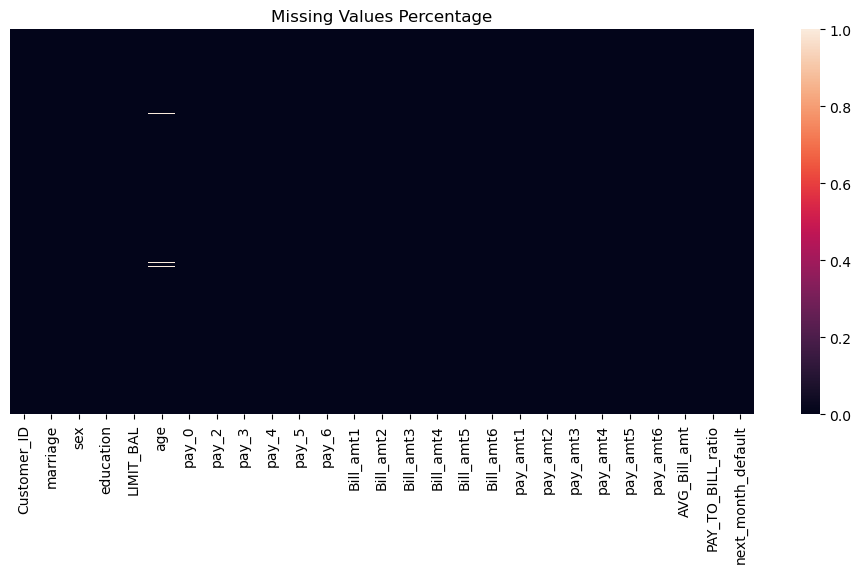

In [788]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=True, yticklabels= False)
plt.title("Missing Values Percentage")

In [789]:
df[df.isnull().any(axis=1)]

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
9,5026,2,1,1,440000,NaN,0,-1,-1,-2,...,11350.05,8998.93,0.00,0.00,10960.93,502.87,448.09,9569.17,0.36,0
124,5141,2,0,1,430000,NaN,0,0,0,0,...,8311.03,9999.48,5000.25,5540.09,8309.78,5639.97,2819.78,29062.83,0.21,0
210,5227,1,1,3,70000,NaN,0,0,0,0,...,49704.14,2923.94,1923.52,1726.06,1762.86,2135.98,1384.03,56239.17,0.04,0
258,5275,1,0,2,360000,NaN,-1,-1,-1,-1,...,2406.82,1087.93,3215.24,3104.09,2026.09,2414.03,8088.92,2341.00,1.42,1
397,5414,2,0,1,20000,NaN,0,0,0,-1,...,0.00,1212.26,1000.05,400.05,0.00,0.00,1999.84,3835.17,0.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24815,29832,2,1,2,50000,NaN,0,0,0,0,...,42722.44,3000.20,2000.33,1436.05,2000.24,2000.14,1999.61,46370.17,0.04,0
25079,30096,1,1,2,100000,NaN,0,0,0,0,...,41835.38,2999.71,2027.89,3354.03,2327.80,7300.00,0.00,33181.33,0.09,0
25111,30128,1,1,2,50000,NaN,0,0,0,0,...,14453.36,2078.91,2000.87,499.98,4422.97,4000.10,2000.19,26754.33,0.09,1
25157,30174,2,0,1,50000,NaN,0,0,0,0,...,17887.34,1600.25,1700.26,1199.79,999.95,999.68,1000.29,16007.67,0.08,0


In [790]:
df['age'].fillna(df['age'].mean(), inplace=True)

Text(0.5, 1.0, 'Missing Values Percentage')

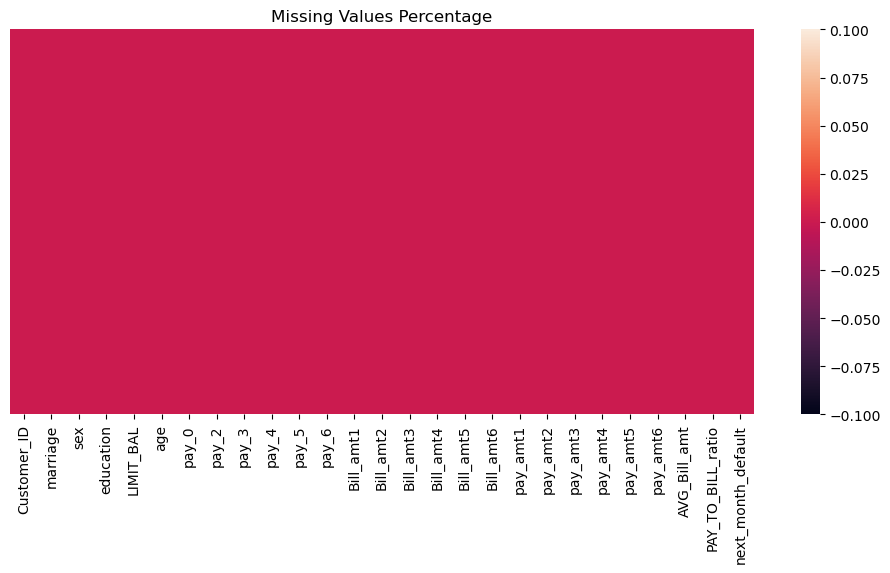

In [791]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=True, yticklabels= False)
plt.title("Missing Values Percentage")

In [792]:
#renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'pay_0':'pay_jun','pay_2':'pay_may','pay_3':'pay_apr','pay_4':'pay_mar','pay_5':'pay_feb','pay_6':'pay_jan'},inplace=True)
df.rename(columns={'Bill_amt1':'Bill_amt_jun','Bill_amt2':'Bill_amt_may','Bill_amt3':'Bill_amt_apr','Bill_amt4':'Bill_amt_mar','Bill_amt5':'Bill_amt_feb','Bill_amt6':'Bill_amt_jan'}, inplace = True)
df.rename(columns={'pay_amt1':'pay_amt_jun','pay_amt2':'pay_amt_may','pay_amt3':'pay_amt_apr','pay_amt4':'pay_amt_mar','pay_amt5':'pay_amt_feb','pay_amt_6':'pay_amt1_jan'},inplace=True)

In [793]:
#replacing values with labels
#replacing values with there labels
df.replace({'sex': {1 : 'Male', 0 : 'Female'}}, inplace=True)
df.replace({'education' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'marriage' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'next_month_default' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [794]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_jun,pay_may,pay_apr,pay_mar,...,Bill_amt_jan,pay_amt_jun,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,Single,Female,University,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,No
1,5018,Single,Male,Graduate School,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,No
2,5019,Married,Female,University,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,No
3,5020,Married,Male,University,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,No
4,5021,Single,Female,Graduate School,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,No


# EDA(Exploratory Data Analysis)

 ## Dependent Variable
 
 next_month_default


In [795]:
df['next_month_default'].value_counts()

next_month_default
No     20440
Yes     4807
Name: count, dtype: int64

In [796]:
df['next_month_default'].value_counts(normalize=True)

next_month_default
No     0.809601
Yes    0.190399
Name: proportion, dtype: float64

<Axes: xlabel='next_month_default'>

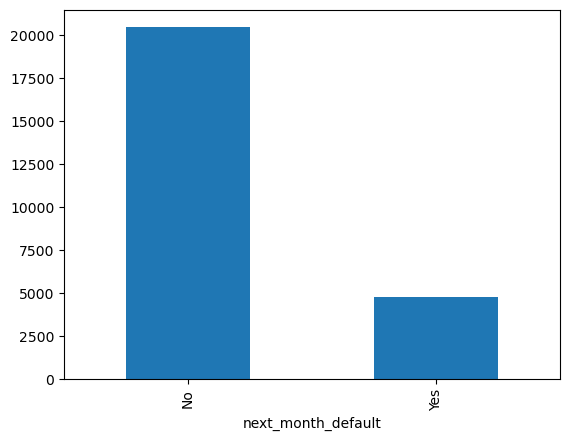

In [797]:
df['next_month_default'].value_counts().plot(kind='bar')

Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

# Independent Variables

# Categorical Features

We have few categorical features in our dataset. Let'Check how they are related with out target class.

## Sex

In [798]:
df['sex'].value_counts()

sex
Male      15252
Female     9995
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

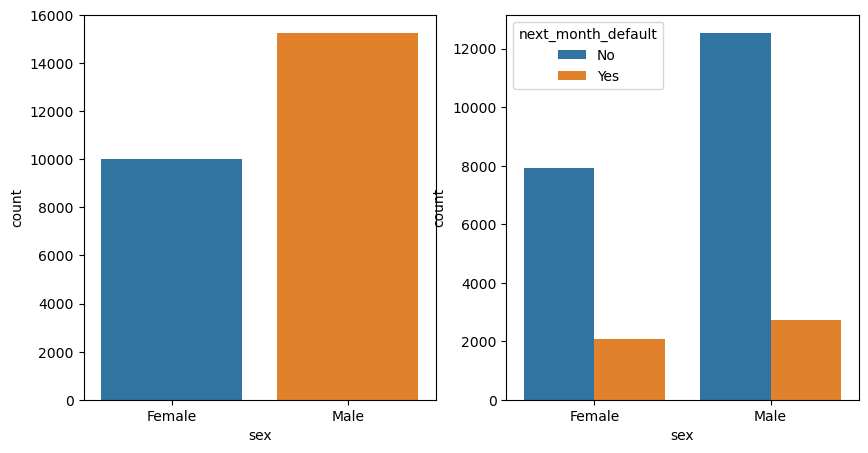

In [799]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'sex', ax = axes[0], data = df)
sns.countplot(x = 'sex', hue = 'next_month_default',ax = axes[1], data = df)

In [800]:
#to find the ratio pf defaulters with respect to sex
sex_default_percent = pd.crosstab(df['sex'], df['next_month_default'], normalize='index') * 100
sex_default_percent = sex_default_percent.round(2)

print("Percentage (within each sex):")
print(sex_default_percent)

Percentage (within each sex):
next_month_default     No    Yes
sex                             
Female              79.14  20.86
Male                82.15  17.85


We see that sex does not segregate defaulters significantly

## Education

In [801]:
df['education'].value_counts()

education
University         11717
Graduate School     8988
High School         4115
5                    253
Others               116
6                     44
0                     14
Name: count, dtype: int64

We only had 4 defined categories, but here we see 5, 6 and 0 are also present.
   
Hence we need to group them with 'Others'

In [802]:
fil = (df['education'] == 0) | (df['education'] == 5) | (df['education'] == 6) | (df['education'] == 4)
df.loc[fil, 'education'] = 'Others'

df['education'].value_counts()

education
University         11717
Graduate School     8988
High School         4115
Others               427
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

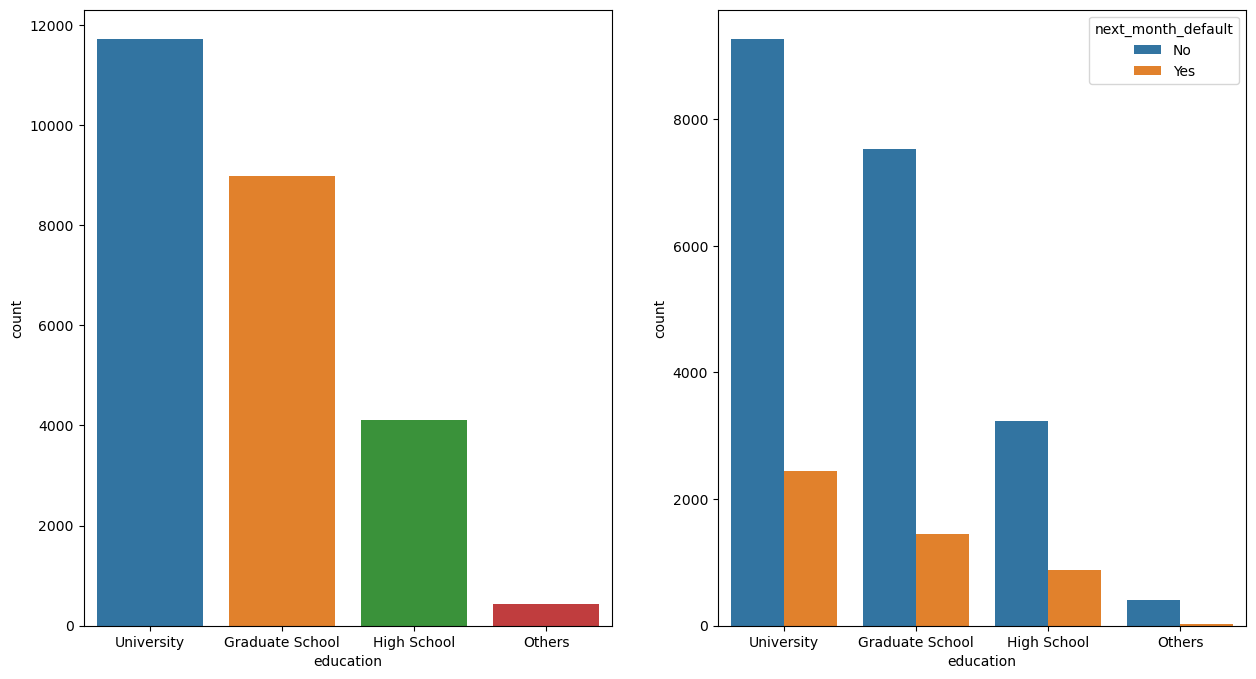

In [803]:
fig, axes = plt.subplots(ncols=2,figsize=(15, 8))
sns.countplot(x = 'education', ax = axes[0], data = df)
sns.countplot(x = 'education', hue = 'next_month_default',ax = axes[1], data = df)

In [804]:
#to find the ratio of defaulters with respect to education
ed_default_percent = pd.crosstab(df['education'], df['next_month_default'], normalize='index') * 100
ed_default_percent = ed_default_percent.round(2)

print("Percentage (within each education):")
print(ed_default_percent)

Percentage (within each education):
next_month_default     No    Yes
education                       
Graduate School     83.82  16.18
High School         78.69  21.31
Others              93.91   6.09
University          79.09  20.91


## Age

In [805]:
#age wise values of credit card holder
df['age'] = df['age'].astype(int)
df['age'].value_counts()

age
29    1353
27    1258
28    1188
30    1162
35    1077
26    1049
31    1027
34     979
25     976
33     976
24     948
32     946
36     944
37     876
39     806
38     800
23     774
40     741
41     695
42     659
44     566
43     561
45     513
46     491
22     468
47     404
48     382
49     358
50     333
51     290
53     262
52     247
54     206
55     171
56     148
57     104
58      96
59      80
21      58
60      58
61      44
62      37
63      24
64      21
66      21
65      20
67      13
69      12
70       9
68       5
72       3
71       2
75       2
73       2
79       1
74       1
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='count'>

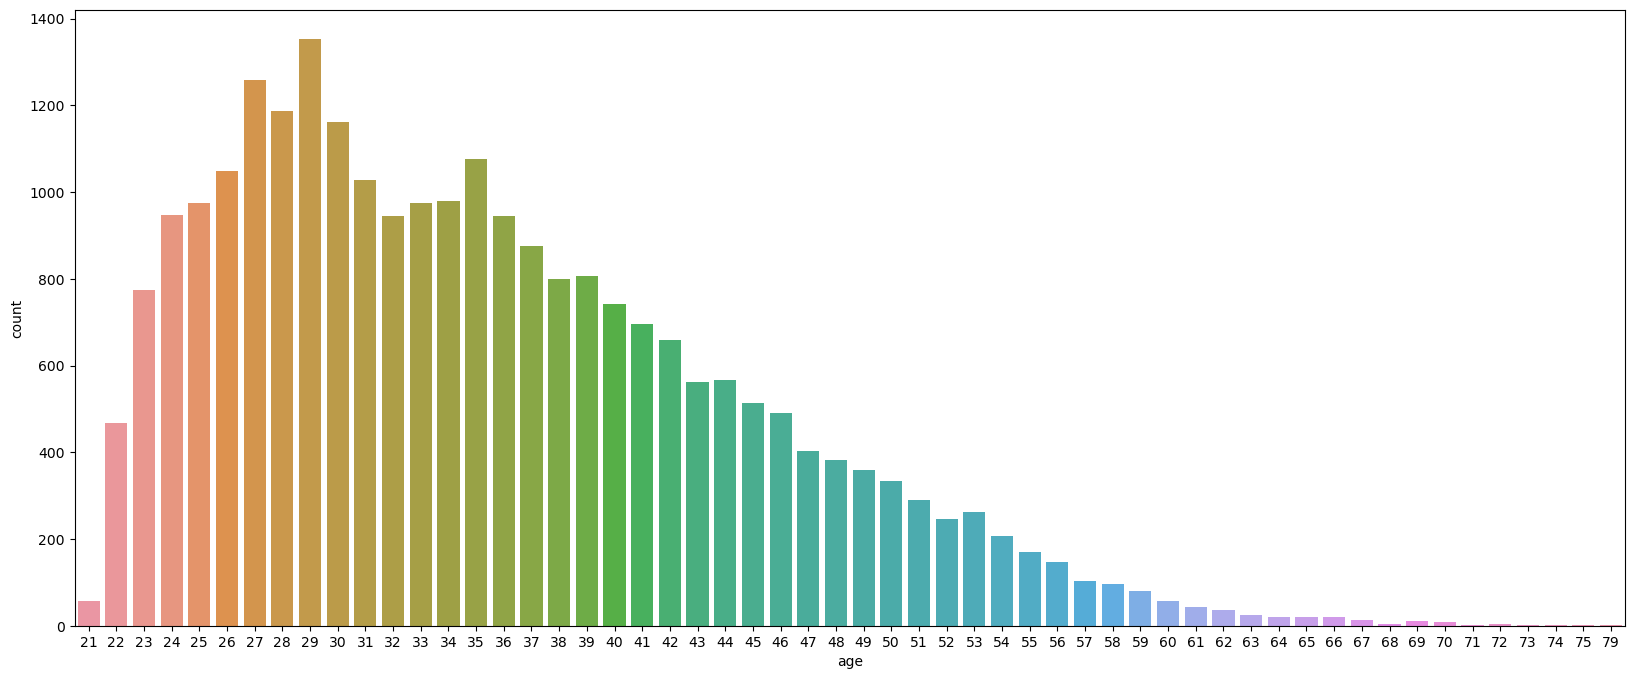

In [806]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'age', data = df)

<Axes: xlabel='age', ylabel='count'>

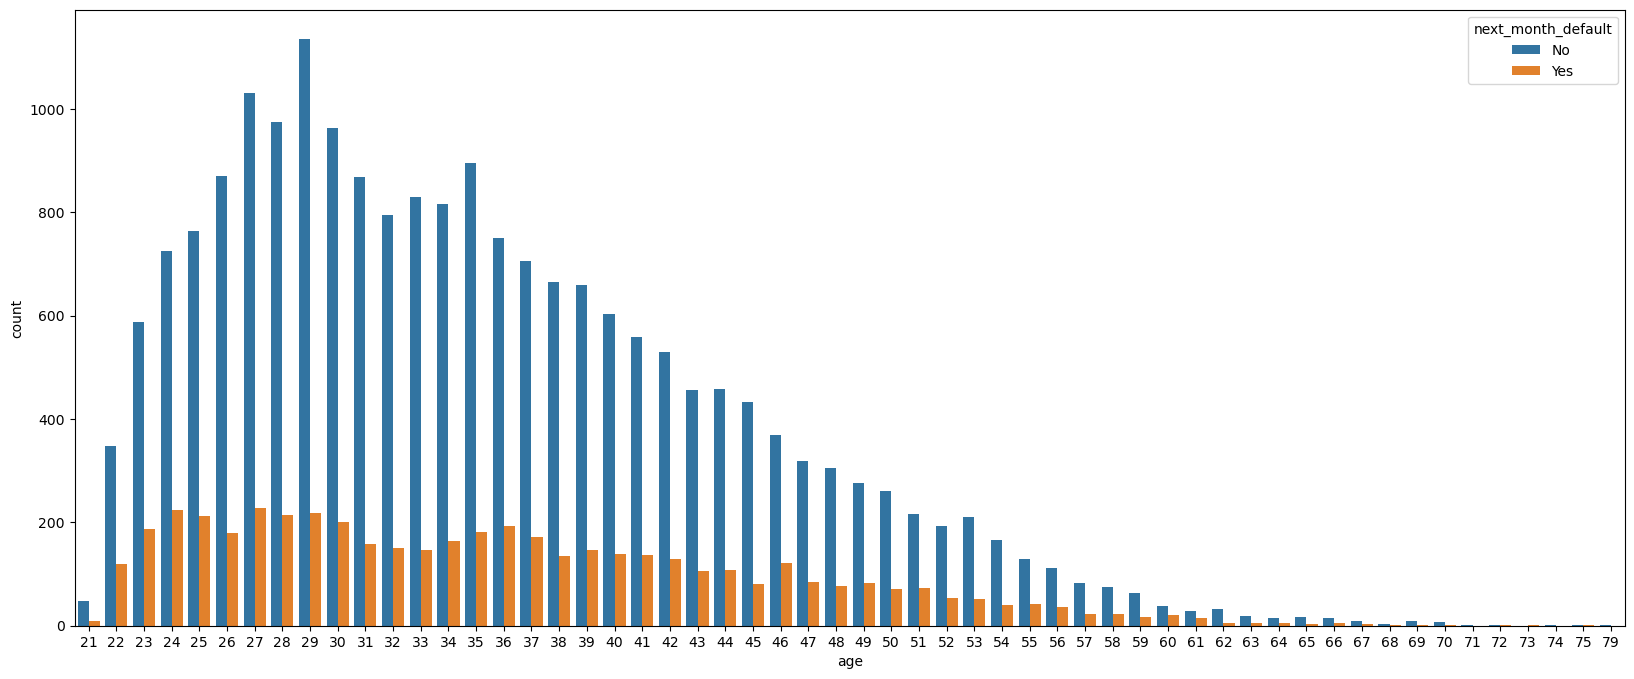

In [807]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'age', hue = 'next_month_default', data = df)

## Marriage

In [808]:
#Value counts for marriage category
df['marriage'].value_counts()

marriage
Single     13441
Married    11480
Others       273
0             53
Name: count, dtype: int64

Replacing Marital status '0' with 'Others'

In [809]:
fil = df['marriage']==0
df.loc[fil,'marriage'] = 'Others'
df['marriage'].value_counts()

marriage
Single     13441
Married    11480
Others       326
Name: count, dtype: int64

<Axes: xlabel='marriage', ylabel='count'>

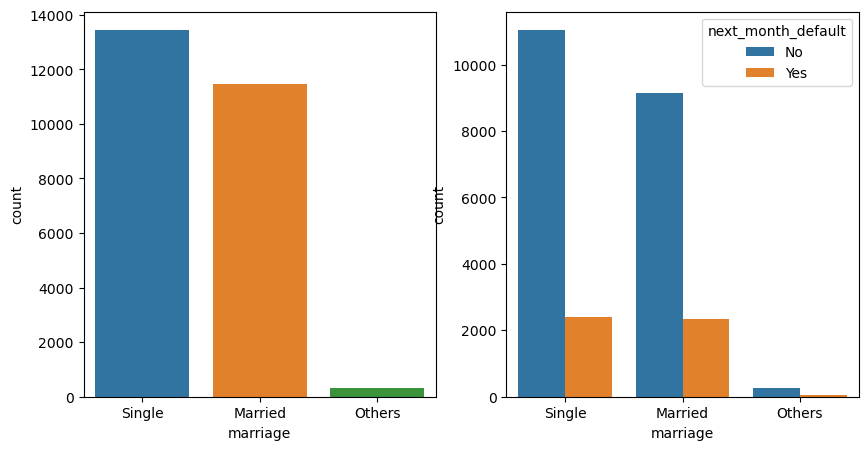

In [810]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'marriage', ax = axes[0], data = df)
sns.countplot(x = 'marriage', hue = 'next_month_default',ax = axes[1], data = df)

In [811]:
marriage_default_percent = pd.crosstab(df['marriage'], df['next_month_default'], normalize='index') * 100
marriage_default_percent = marriage_default_percent.round(2)

print("Percentage (within each marital status):")
print(marriage_default_percent)

Percentage (within each marital status):
next_month_default     No    Yes
marriage                        
Married             79.63  20.37
Others              80.37  19.63
Single              82.11  17.89


### Observations

## Checking Correlation

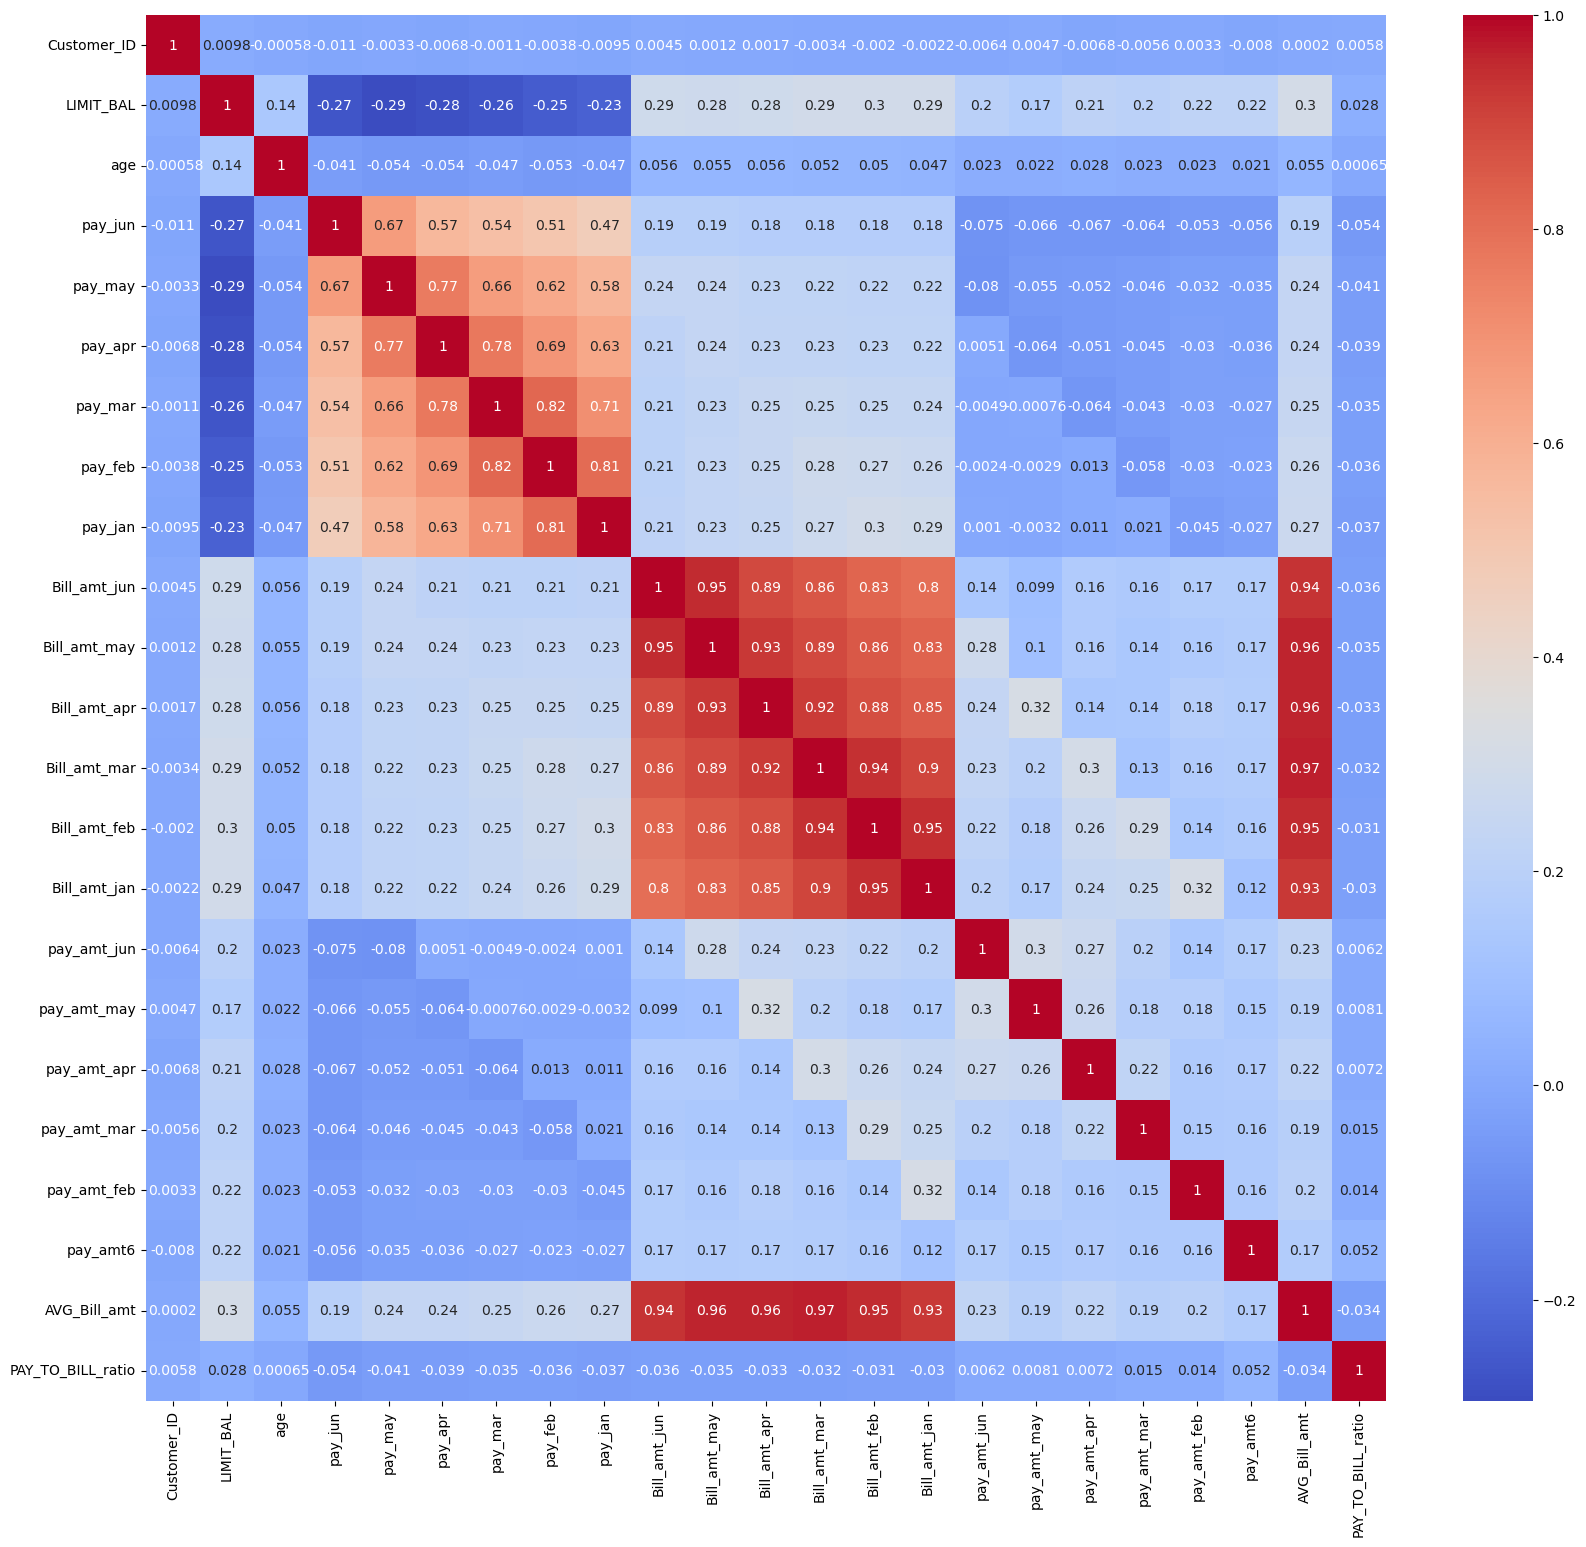

In [812]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.show()

In [813]:
df.shape


(25247, 27)

# One Hot Encoding

In [814]:
#Label encoding 
encode_num = {"sex":{"Female":0,"Male":1}, "next_month_default":{"Yes":1,"No":0}}
df=df.replace(encode_num)

In [815]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_jun,pay_may,pay_apr,pay_mar,...,Bill_amt_jan,pay_amt_jun,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,Single,0,University,60000,25,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,Single,1,Graduate School,290000,24,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,Married,0,University,180000,63,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,Married,1,University,210000,43,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,Single,0,Graduate School,280000,32,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [816]:
df.shape

(25247, 27)

In [817]:
#creating dummy variables
df = pd.get_dummies(df, columns=['education','marriage']) 

In [818]:
df.shape

(25247, 32)

In [819]:
df.head()

,Customer_ID,sex,LIMIT_BAL,age,pay_jun,pay_may,pay_apr,pay_mar,pay_feb,pay_jan,...,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,education_Graduate School,education_High School,education_Others,education_University,marriage_Married,marriage_Others,marriage_Single
0,5017,0,60000,25,2,2,2,0,0,0,...,41511.50,0.03,0,False,False,False,True,False,False,True
1,5018,1,290000,24,0,0,-2,-2,-1,0,...,2534.50,0.27,0,True,False,False,False,False,False,True
2,5019,0,180000,63,0,0,0,0,0,0,...,50422.00,0.04,0,False,False,False,True,True,False,False
3,5020,1,210000,43,0,0,0,0,0,0,...,86229.50,0.04,0,False,False,False,True,True,False,False
4,5021,0,280000,32,-2,-2,-2,-2,-2,-2,...,11814.33,0.72,0,True,False,False,False,False,False,True


In [820]:
df.drop(['education_Others', 'marriage_Others'], axis=1, inplace=True)


Why Drop One?

In models like Logistic Regression, having all 3 columns creates linear dependency (called dummy variable trap).

Dropping one solves that without losing information — because the missing category is implied when the other two are 0.


In [821]:
df.shape

(25247, 30)

In [822]:
#creating dummy variables by dropping first variable
df = pd.get_dummies(df, columns=['pay_jun', 'pay_may', 'pay_apr', 'pay_mar', 'pay_feb', 'pay_jan'], drop_first = True )

In [823]:
df.shape

(25247, 80)

In [824]:
df.head()

,Customer_ID,sex,LIMIT_BAL,age,Bill_amt_jun,Bill_amt_may,Bill_amt_apr,Bill_amt_mar,Bill_amt_feb,Bill_amt_jan,...,pay_feb_7,pay_jan_-1,pay_jan_0,pay_jan_2,pay_jan_3,pay_jan_4,pay_jan_5,pay_jan_6,pay_jan_7,pay_jan_8
0,5017,0,60000,25,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,...,False,False,True,False,False,False,False,False,False,False
1,5018,1,290000,24,11157.67,0.00,0.88,0.65,2700.96,1350.30,...,False,False,True,False,False,False,False,False,False,False
2,5019,0,180000,63,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,...,False,False,True,False,False,False,False,False,False,False
3,5020,1,210000,43,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,...,False,False,True,False,False,False,False,False,False,False
4,5021,0,280000,32,19666.40,999.04,3186.48,44932.48,2099.77,1.35,...,False,False,False,False,False,False,False,False,False,False


In [825]:
df.shape

(25247, 80)

# Handling Class Imbalance
To remediate our imbalanced dataset we use SMOTE


## SMOTE - Synthetic Minority Oversampling Technique

In [826]:
!pip install scikit-learn

In [827]:
import sklearn
print(sklearn.__version__)

1.6.1


In [828]:
!pip install imblearn --user

In [829]:
import sys
print(sys.executable)


C:\Users\vedik\anaconda3\python.exe


In [830]:
!C:\Users\vedik\anaconda3\python.exe -m pip install imblearn --user


In [831]:
#importing SMOTE to handle class imbalance
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [832]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'next_month_default')], df['next_month_default'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 25247
Resampled balanced dataset shape 40880


In [833]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'next_month_default'))

In [834]:
balanced_df.head

<bound method NDFrame.head of        Customer_ID  sex  LIMIT_BAL  age   Bill_amt_jun   Bill_amt_may  \
0             5017    0      60000   25   60323.860000   60728.220000   
1             5018    1     290000   24   11157.670000       0.000000   
2             5019    0     180000   63   47930.960000   48921.910000   
3             5020    1     210000   43   91152.440000   92916.010000   
4             5021    0     280000   32   19666.400000     999.040000   
...            ...  ...        ...  ...            ...            ...   
40875        12835    0      50000   37   49338.677292   37218.997063   
40876        10941    1      80000   36   83347.613790   82810.337914   
40877         9301    1      50000   30   49250.351661   48737.244649   
40878        25415    0     190484   32  183782.306022  191822.193473   
40879        17715    1     140819   23   89865.828483   91501.018134   

        Bill_amt_apr   Bill_amt_mar  Bill_amt_feb  Bill_amt_jan  ...  \
0       56472.740000 

In [835]:
#adding target variable to new created dataframe
balanced_df['next_month_default'] = y_smote

In [836]:
#shape of balanced dataframe
balanced_df.shape

(40880, 80)

<Axes: xlabel='next_month_default', ylabel='count'>

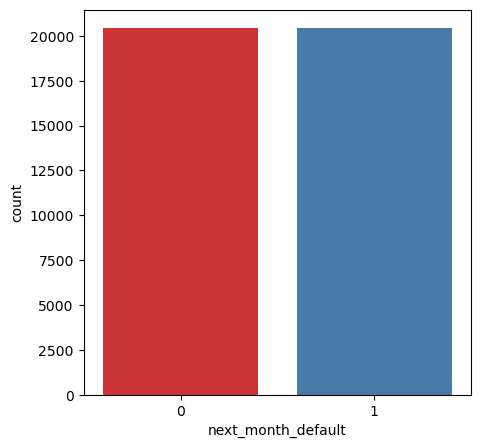

In [837]:
#checking for class imbalance
plt.figure(figsize=(5,5))
sns.countplot(x='next_month_default', data = balanced_df, palette = "Set1" )

In [838]:
#removing feature ID from dataset
balanced_df.drop('Customer_ID',axis = 1, inplace = True)

In [839]:
#final dataset
balanced_df.head()

,sex,LIMIT_BAL,age,Bill_amt_jun,Bill_amt_may,Bill_amt_apr,Bill_amt_mar,Bill_amt_feb,Bill_amt_jan,pay_amt_jun,...,pay_jan_-1,pay_jan_0,pay_jan_2,pay_jan_3,pay_jan_4,pay_jan_5,pay_jan_6,pay_jan_7,pay_jan_8,next_month_default
0,0,60000,25,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,...,False,True,False,False,False,False,False,False,False,0
1,1,290000,24,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,...,False,True,False,False,False,False,False,False,False,0
2,0,180000,63,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,...,False,True,False,False,False,False,False,False,False,0
3,1,210000,43,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,...,False,True,False,False,False,False,False,False,False,0
4,0,280000,32,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,...,False,False,False,False,False,False,False,False,False,0


In [840]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'next_month_default'))]
y = balanced_df['next_month_default']

In [841]:
X.shape

(40880, 78)

In [842]:
y.shape

(40880,)

## Data Transformation

In [843]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

## Train Test Splitting

In [844]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [845]:
X_train.shape

(32704, 78)

In [846]:
X_test.shape

(8176, 78)

# Model Implementation

## Logistic Regression Model

In [847]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [848]:
#fitting data into Logistic Regression
logi = LogisticRegression(fit_intercept=True, max_iter=10000)
logi.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [849]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [850]:
#getting all score for logistic regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("Train data) accuracy = ", train_accuracy_logi)
print("Test data accuracy = ", accuracy_logi)
print("Test data precision = ", precision_score_logi)
print("Test data recall = ", recall_score_logi)
print("Test data f1 score = ", f1_score_logi)
print("Test data roc_score = ", roc_score_logi)

Train data) accuracy =  0.815
Test data accuracy =  0.821
Test data precision =  0.777
Test data recall =  0.852
Test data f1 score =  0.813
Test data roc_score =  0.823


[[3534  554]
 [ 910 3178]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

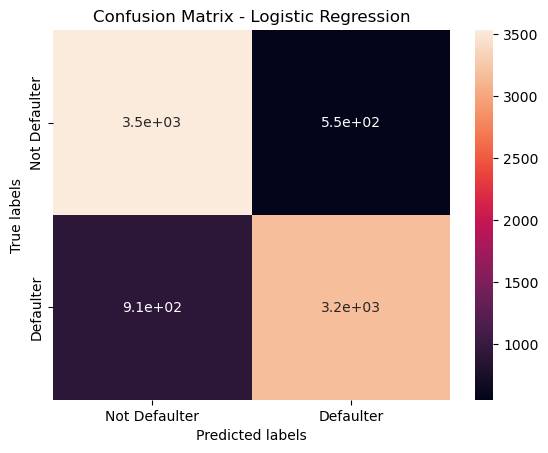

In [851]:
#Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Decision tree classification

In [852]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [853]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [854]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [855]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.836
The precision on test data is  0.847
The recall on test data is  0.829
The f1 on test data is  0.838
The roc_score on test data is  0.836


[[3372  716]
 [ 625 3463]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

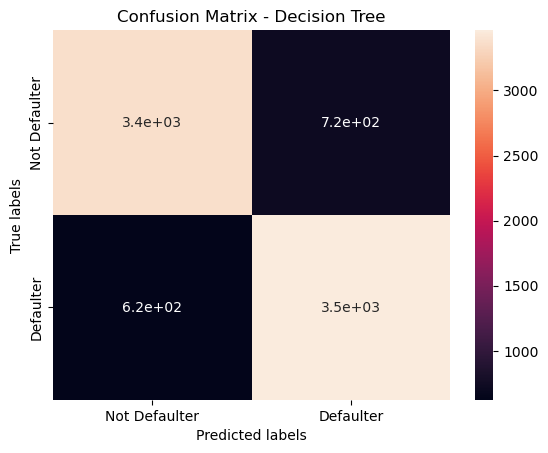

In [856]:
# Get the confusion matrix for desicion tree
labels = ['Not Defaulter', 'Defaulter']
cm_dt = confusion_matrix(y_test, y_pred_dtc )
print(cm_dt)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Random Forest Classification

In [857]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [858]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [859]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [860]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.898
The precision on test data is  0.866
The recall on test data is  0.925
The f1 on test data is  0.895
The roc_score on test data is  0.9


[[3803  285]
 [ 549 3539]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

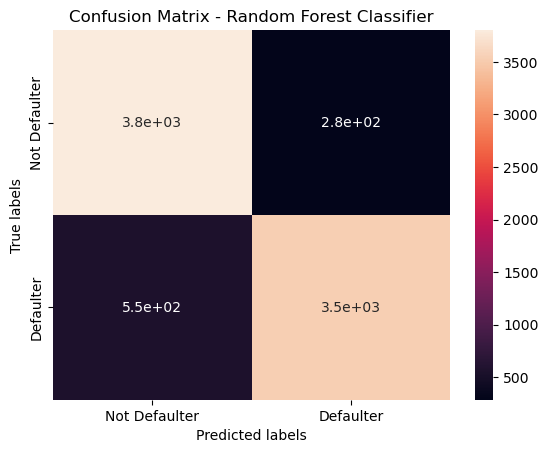

In [861]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### Gradient Boosting 

In [862]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [863]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [864]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [865]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.879
The accuracy on test data is  0.88
The precision on test data is  0.819
The recall on test data is  0.934
The f1 on test data is  0.873
The roc_score on test data is  0.886


[[3850  238]
 [ 740 3348]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

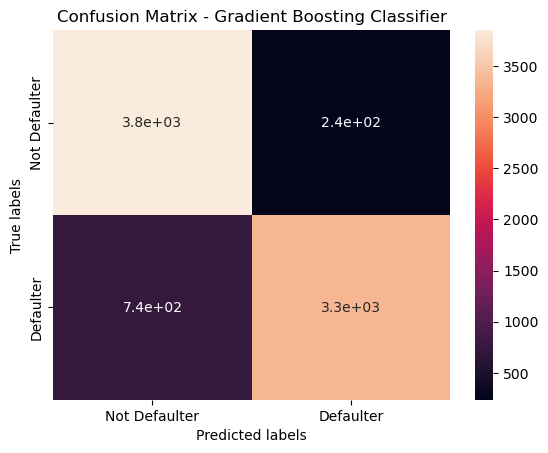

In [866]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Support Vector Machine

In [867]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [868]:
#fitting data into Support Vector Classifier
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [869]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [870]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.624
The accuracy on test data is  0.628
The precision on test data is  0.707
The recall on test data is  0.61
The f1 on test data is  0.655
The roc_score on test data is  0.631


[[2244 1844]
 [1198 2890]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

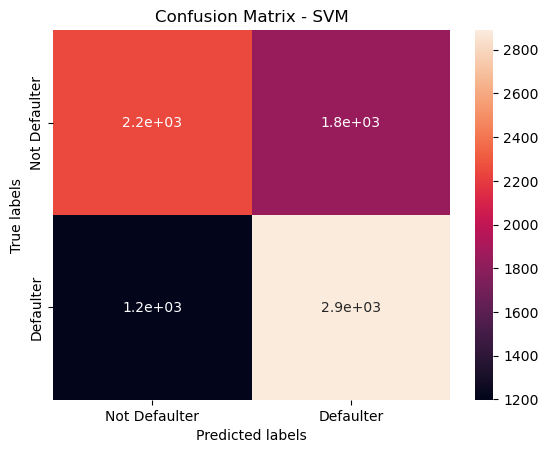

In [871]:
# Get the confusion matrix for Support Vector Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## XG Boosting

In [877]:
!pip install xgboost

In [878]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [879]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [880]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [881]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.94
The accuracy on test data is  0.891
The precision on test data is  0.84
The recall on test data is  0.935
The f1 on test data is  0.885
The roc_score on test data is  0.895


[[3848  240]
 [ 653 3435]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

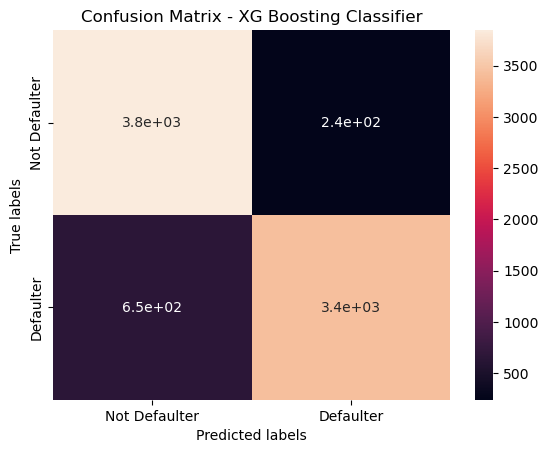

In [882]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Baseline Model Comparision

In [883]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [884]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})


In [885]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.815,0.821,0.777,0.852,0.813,0.823
1,Decision Tree,1.000,0.836,0.847,0.829,0.838,0.836
2,Random Forest,1.000,0.898,0.866,0.925,0.895,0.900
3,SVM,0.624,0.628,0.707,0.610,0.655,0.631
4,Gradient Boosting,0.879,0.880,0.819,0.934,0.873,0.886
5,XG Boosting,0.940,0.891,0.840,0.935,0.885,0.895


In [886]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,1.000,0.898,0.866,0.925,0.895,0.900
5,XG Boosting,0.940,0.891,0.840,0.935,0.885,0.895
4,Gradient Boosting,0.879,0.880,0.819,0.934,0.873,0.886
1,Decision Tree,1.000,0.836,0.847,0.829,0.838,0.836
0,Logistic Regression,0.815,0.821,0.777,0.852,0.813,0.823
3,SVM,0.624,0.628,0.707,0.610,0.655,0.631


## Combined ROC curve for all the models

In [887]:
#importing roc curve
from sklearn.metrics import roc_curve

In [888]:
#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

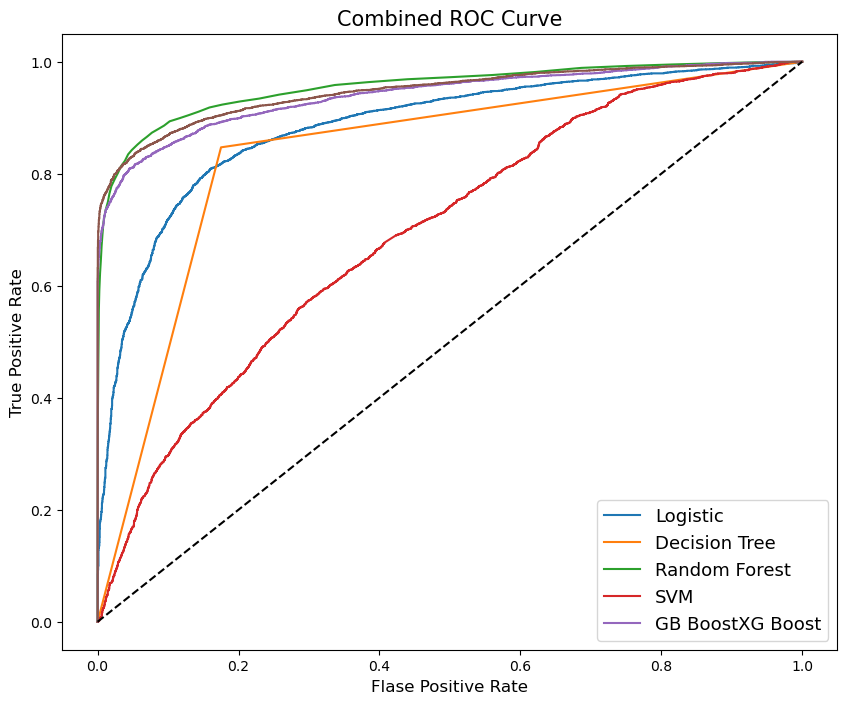

In [889]:
fig = plt.figure(figsize=(10,8)) 

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_svm)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

## Feature Importance On Random Forest Model

In [890]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'next_month_default')

In [891]:
feature_importances_rfc = rfc.feature_importances_

In [892]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [893]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

pay_jun_2          0.088907
pay_may_2          0.064464
pay_apr_2          0.041307
pay_amt_jun        0.038031
pay_amt_may        0.034062
pay_amt_apr        0.033368
Bill_amt_jun       0.033153
pay_amt_mar        0.032098
AVG_Bill_amt       0.031761
pay_amt_feb        0.031257
pay_amt6           0.030943
marriage_Single    0.030351
Bill_amt_may       0.030307
Bill_amt_mar       0.029180
Bill_amt_jan       0.029149
dtype: float64

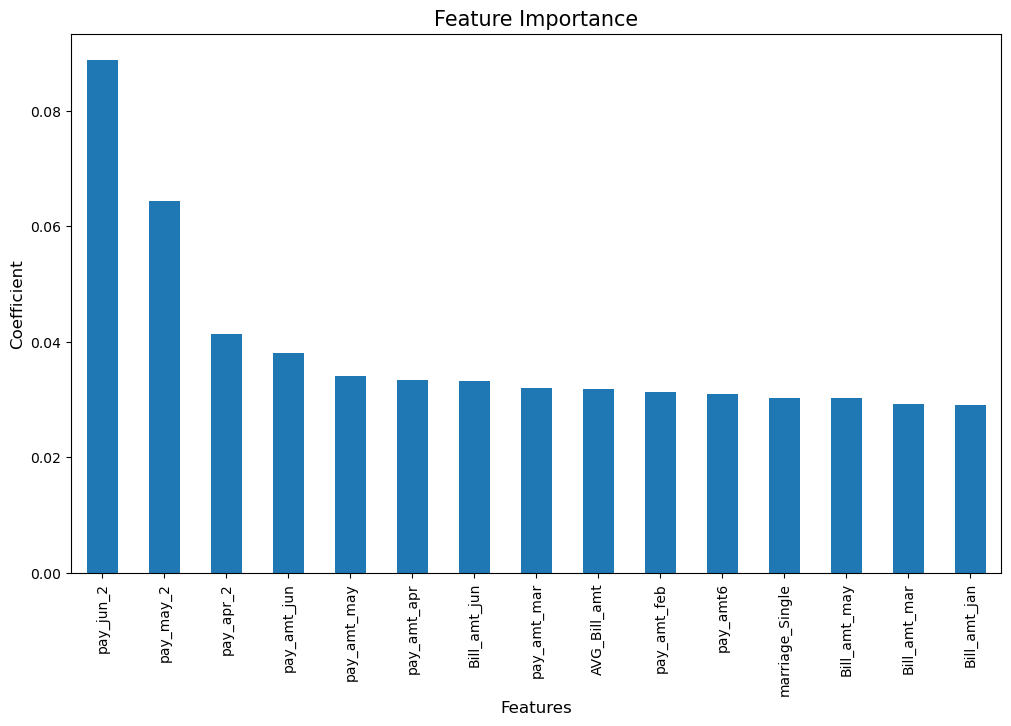

In [894]:
fig = plt.figure(figsize=(12,7)) 
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

## Cross Validation & Hyperparameter Tuning

In [895]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression Model

In [896]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500, 5000],
              'C' : C }

In [897]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5,
                               10],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [898]:
logi_grid.best_estimator_

LogisticRegression(C=5, max_iter=5000)

In [899]:
logi_grid.best_params_

{'C': 5, 'max_iter': 5000, 'penalty': 'l2'}

In [900]:
logi_optimal_model = logi_grid.best_estimator_

In [901]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:,1]

In [902]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.8
The accuracy on test data is  0.808
The precision on test data is  0.764
The recall on test data is  0.837
The f1 on test data is  0.799
The auc on test data is  0.81


In [903]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

In [904]:
train_cm_logi_grid

array([[13853,  2499],
       [ 4051, 12301]], dtype=int64)

In [905]:
test_cm_logi_grid

array([[3482,  606],
       [ 965, 3123]], dtype=int64)

## Decision Tree Classification

In [906]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [907]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [908]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=35, min_samples_leaf=40,
                       min_samples_split=0.01)

In [909]:
dtc_grid.best_params_

{'max_depth': 35, 'min_samples_leaf': 40, 'min_samples_split': 0.01}

In [910]:
dtc_optimal_model = dtc_grid.best_estimator_

In [911]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [912]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.854
The accuracy on test data is  0.854
The precision on test data is  0.792
The recall on test data is  0.904
The f1 on test data is  0.844
The auc on test data is  0.859


In [913]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [914]:
train_cm_dtc_grid

array([[15011,  1341],
       [ 3441, 12911]], dtype=int64)

In [915]:
test_cm_dtc_grid

array([[3745,  343],
       [ 852, 3236]], dtype=int64)

## Support Vector Machine

In [916]:
from sklearn.model_selection import RandomizedSearchCV

In [917]:
# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [918]:
# Create an instance of the support vector classifier
svm=SVC(probability=True)

# Grid search
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [919]:
svm_grid.best_estimator_

SVC(C=10, probability=True)

In [920]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 10}

In [921]:
svm_optimal_model = svm_grid.best_estimator_

In [922]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(X_test)
y_train_pred_svm_grid=svm_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_test)[:,1]

In [923]:
#getting all scores for Support Vector Classifier after CV and Hyperparameter Tunning
train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
precision_score_svm_grid = round(precision_score(y_pred_svm_grid,y_test), 3)
recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
auc_svm_grid = round(roc_auc_score(y_pred_svm_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm_grid)
print("The accuracy on test data is ", accuracy_svm_grid)
print("The precision on test data is ", precision_score_svm_grid)
print("The recall on test data is ", recall_score_svm_grid)
print("The f1 on test data is ", f1_score_svm_grid)
print("The auc on test data is ", auc_svm_grid)

The accuracy on train data is  0.646
The accuracy on test data is  0.648
The precision on test data is  0.793
The recall on test data is  0.615
The f1 on test data is  0.693
The auc on test data is  0.662


In [924]:
# Get the confusion matrices for train and test
train_cm_svm_grid = confusion_matrix(y_train,y_train_pred_svm_grid)
test_cm_svm_grid = confusion_matrix(y_test,y_pred_svm_grid )

In [925]:
train_cm_svm_grid

array([[ 8229,  8123],
       [ 3443, 12909]], dtype=int64)

In [926]:
test_cm_svm_grid

array([[2056, 2032],
       [ 845, 3243]], dtype=int64)

## Random Forest Classifer


In [927]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [928]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   9.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   8.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   8.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   8.9s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   8.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=  13.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=  13.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=  13.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=  13.2s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [929]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=150)

In [930]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [931]:
rfc_optimal_model = rfc_grid.best_estimator_

In [932]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [933]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.868
The accuracy on test data is  0.864
The precision on test data is  0.828
The recall on test data is  0.892
The f1 on test data is  0.859
The auc on test data is  0.866


In [934]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [935]:
train_cm_rfc_grid

array([[14822,  1530],
       [ 2802, 13550]], dtype=int64)

In [936]:
test_cm_rfc_grid

array([[3680,  408],
       [ 703, 3385]], dtype=int64)

In [937]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [938]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.05, max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time= 2.7min
[CV] END learning_rate=0.05, max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time= 2.7min
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time= 2.0min
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time= 2.1min
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time= 2.9min
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time= 3.0min
[CV] END learning_rate=1, max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time= 2.6min
[CV] END learning_rate=1, max_depth=10, min_samples_leaf=40, min_samples_split=50, n_

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [939]:
gbc_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=20,
                           min_samples_leaf=50, min_samples_split=50,
                           n_estimators=150, random_state=42)

In [940]:
gbc_grid.best_params_

{'n_estimators': 150,
 'min_samples_split': 50,
 'min_samples_leaf': 50,
 'max_depth': 20,
 'learning_rate': 0.05}

In [941]:
gbc_optimal_model = gbc_grid.best_estimator_

In [942]:
gbc_optimal_model = gbc_grid.best_estimator_

In [943]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [944]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.98
The accuracy on test data is  0.897
The precision on test data is  0.852
The recall on test data is  0.936
The f1 on test data is  0.892
The auc on test data is  0.9


In [945]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

In [946]:
train_cm_gbc_grid

array([[16329,    23],
       [  642, 15710]], dtype=int64)

In [947]:
test_cm_gbc_grid

array([[3849,  239],
       [ 607, 3481]], dtype=int64)

## XG Boosting

In [948]:
from sklearn.model_selection import RandomizedSearchCV

In [949]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [950]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [951]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=25,
              max_leaves=None, min_child_weight=1, min_samples_leaf=40,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=250, n_jobs=None, ...)

In [952]:
xgb_grid.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 40,
 'min_child_weight': 1,
 'max_depth': 25,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [953]:
xgb_optimal_model = xgb_grid.best_estimator_

In [954]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [955]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  1.0
The accuracy on test data is  0.901
The precision on test data is  0.861
The recall on test data is  0.937
The f1 on test data is  0.897
The auc on test data is  0.904


In [956]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

## Final Model Comparision

In [957]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

In [958]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [959]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [960]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [961]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [962]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
11,Optimal XG Boosting,1.000,0.901,0.861,0.937,0.897,0.904
2,Random Forest,1.000,0.898,0.866,0.925,0.895,0.900
10,Optimal Gradient Boosting,0.980,0.897,0.852,0.936,0.892,0.900
5,XG Boosting,0.940,0.891,0.840,0.935,0.885,0.895
4,Gradient Boosting,0.879,0.880,0.819,0.934,0.873,0.886
8,Optimal Random Forest,0.868,0.864,0.828,0.892,0.859,0.866
7,Optimal Decision Tree,0.854,0.854,0.792,0.904,0.844,0.859
1,Decision Tree,1.000,0.836,0.847,0.829,0.838,0.836
0,Logistic Regression,0.815,0.821,0.777,0.852,0.813,0.823
6,Optimal Logistic Regression,0.800,0.808,0.764,0.837,0.799,0.810


# Validation Dataset


In [963]:
df_valid = pd.read_csv('validate_dataset_final.csv')

In [964]:
#viewing dataset
df_valid.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [965]:
# Check data shape
df_valid.shape

(5016, 26)

In [966]:
df_valid.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,5016.0,2508.500000,1448.138806,1.00,1254.7500,2508.500,3762.2500,5016.00
marriage,5016.0,1.554027,0.517560,0.00,1.0000,2.000,2.0000,3.00
sex,5016.0,0.606659,0.488540,0.00,0.0000,1.000,1.0000,1.00
education,5016.0,1.840909,0.794177,0.00,1.0000,2.000,2.0000,6.00
LIMIT_BAL,5016.0,168977.272727,129478.787500,10000.00,50000.0000,140000.000,240000.0000,800000.00
age,5016.0,35.379785,9.206542,21.00,28.0000,34.000,41.2500,75.00
pay_0,5016.0,-0.031300,1.116011,-2.00,-1.0000,0.000,0.0000,8.00
pay_2,5016.0,-0.161683,1.178731,-2.00,-1.0000,0.000,0.0000,7.00
pay_3,5016.0,-0.188198,1.172155,-2.00,-1.0000,0.000,0.0000,7.00
pay_4,5016.0,-0.235048,1.129667,-2.00,-1.0000,0.000,0.0000,7.00


In [967]:
#check for any duplicates
len(df_valid[df_valid.duplicated()])

0

In [968]:
# Taking the sum of null values in columns from a dataset
df_valid.isnull().sum()

Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_0                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64

In [969]:
fil = (df_valid['education'] == 0) | (df_valid['education'] == 5) | (df_valid['education'] == 6) | (df_valid['education'] == 4)
df_valid.loc[fil, 'education'] = 'Others'

df_valid['education'].value_counts()

education
2         2374
1         1796
3          760
Others      86
Name: count, dtype: int64

In [970]:
fil = df_valid['marriage']==0
df_valid.loc[fil,'marriage'] = 'Others'
df_valid['marriage'].value_counts()

marriage
2         2702
1         2262
3           43
Others       9
Name: count, dtype: int64

In [971]:
df_valid.rename(columns={'pay_0':'pay_jun','pay_2':'pay_may','pay_3':'pay_apr','pay_4':'pay_mar','pay_5':'pay_feb','pay_6':'pay_jan'},inplace=True)
df_valid.rename(columns={'Bill_amt1':'Bill_amt_jun','Bill_amt2':'Bill_amt_may','Bill_amt3':'Bill_amt_apr','Bill_amt4':'Bill_amt_mar','Bill_amt5':'Bill_amt_feb','Bill_amt6':'Bill_amt_jan'}, inplace = True)
df_valid.rename(columns={'pay_amt1':'pay_amt_jun','pay_amt2':'pay_amt_may','pay_amt3':'pay_amt_apr','pay_amt4':'pay_amt_mar','pay_amt5':'pay_amt_feb','pay_amt_6':'pay_amt1_jan'},inplace=True)

In [972]:
#replacing values with there labels
df_valid.replace({'sex': {1 : 'Male', 0 : 'Female'}}, inplace=True)
df_valid.replace({'education' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df_valid.replace({'marriage' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

In [973]:
# Add dummy column to match expected 78 features
df_valid['default.payment.next.month'] = 0  # dummy placeholder


In [974]:
df_valid.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_jun', 'pay_may', 'pay_apr', 'pay_mar', 'pay_feb', 'pay_jan',
       'Bill_amt_jun', 'Bill_amt_may', 'Bill_amt_apr', 'Bill_amt_mar',
       'Bill_amt_feb', 'Bill_amt_jan', 'pay_amt_jun', 'pay_amt_may',
       'pay_amt_apr', 'pay_amt_mar', 'pay_amt_feb', 'pay_amt6', 'AVG_Bill_amt',
       'PAY_TO_BILL_ratio', 'default.payment.next.month'],
      dtype='object')

In [975]:
df_valid.shape

(5016, 27)

### One hot encoding

In [976]:
#Label encoding 
encode_num = {"sex":{"Female":0,"Male":1}, "default.payment.next.month":{"Yes":1,"No":0}}
df_valid=df_valid.replace(encode_num)

In [977]:
df_valid.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_jun,pay_may,pay_apr,pay_mar,...,Bill_amt_jan,pay_amt_jun,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,default.payment.next.month
0,1,Married,1,University,220000,32,0,0,0,0,...,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31,0
1,2,Single,0,Graduate School,350000,35,-1,-1,-1,0,...,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00,0
2,3,Single,1,Graduate School,310000,39,0,0,0,0,...,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04,0
3,4,Married,0,University,20000,47,0,0,0,2,...,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08,0
4,5,Single,1,University,500000,30,0,0,0,0,...,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23,0


In [978]:
df_valid.shape

(5016, 27)

In [979]:
#creating dummy variables
df_valid = pd.get_dummies(df_valid, columns=['education','marriage']) 

In [980]:
df_valid.shape

(5016, 32)

In [981]:
df.head()

,Customer_ID,sex,LIMIT_BAL,age,Bill_amt_jun,Bill_amt_may,Bill_amt_apr,Bill_amt_mar,Bill_amt_feb,Bill_amt_jan,...,pay_feb_7,pay_jan_-1,pay_jan_0,pay_jan_2,pay_jan_3,pay_jan_4,pay_jan_5,pay_jan_6,pay_jan_7,pay_jan_8
0,5017,0,60000,25,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,...,False,False,True,False,False,False,False,False,False,False
1,5018,1,290000,24,11157.67,0.00,0.88,0.65,2700.96,1350.30,...,False,False,True,False,False,False,False,False,False,False
2,5019,0,180000,63,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,...,False,False,True,False,False,False,False,False,False,False
3,5020,1,210000,43,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,...,False,False,True,False,False,False,False,False,False,False
4,5021,0,280000,32,19666.40,999.04,3186.48,44932.48,2099.77,1.35,...,False,False,False,False,False,False,False,False,False,False


In [982]:
df_valid.drop(['education_Others', 'marriage_Others'], axis=1, inplace=True)

In [983]:
df_valid.shape

(5016, 30)

In [984]:
#creating dummy variables by dropping first variable
df_valid = pd.get_dummies(df_valid, columns=['pay_jun', 'pay_may', 'pay_apr', 'pay_mar', 'pay_feb', 'pay_jan'], drop_first = True )

In [985]:
df_valid.shape

(5016, 75)

In [986]:
df_valid, _ = df_valid.align(df, join='right', axis=1, fill_value=0)

In [987]:
df_valid.shape

(5016, 80)

In [988]:
df_valid.columns

Index(['Customer_ID', 'sex', 'LIMIT_BAL', 'age', 'Bill_amt_jun',
       'Bill_amt_may', 'Bill_amt_apr', 'Bill_amt_mar', 'Bill_amt_feb',
       'Bill_amt_jan', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr',
       'pay_amt_mar', 'pay_amt_feb', 'pay_amt6', 'AVG_Bill_amt',
       'PAY_TO_BILL_ratio', 'next_month_default', 'education_Graduate School',
       'education_High School', 'education_University', 'marriage_Married',
       'marriage_Single', 'pay_jun_-1', 'pay_jun_0', 'pay_jun_1', 'pay_jun_2',
       'pay_jun_3', 'pay_jun_4', 'pay_jun_5', 'pay_jun_6', 'pay_jun_7',
       'pay_jun_8', 'pay_may_-1', 'pay_may_0', 'pay_may_1', 'pay_may_2',
       'pay_may_3', 'pay_may_4', 'pay_may_5', 'pay_may_6', 'pay_may_7',
       'pay_may_8', 'pay_apr_-1', 'pay_apr_0', 'pay_apr_1', 'pay_apr_2',
       'pay_apr_3', 'pay_apr_4', 'pay_apr_5', 'pay_apr_6', 'pay_apr_7',
       'pay_apr_8', 'pay_mar_-1', 'pay_mar_0', 'pay_mar_1', 'pay_mar_2',
       'pay_mar_3', 'pay_mar_4', 'pay_mar_5', 'pay_mar_6', 'pa

In [989]:
#removing feature ID from dataset
df_valid.drop('Customer_ID',axis = 1, inplace = True)

In [990]:
df_valid.shape

(5016, 79)

In [991]:
X_valid = df_valid[(list(i for i in list(df_valid.describe(include='all').columns) if i != 'next_month_default'))]
y_valid = df_valid['next_month_default']

In [992]:
X_valid.shape

(5016, 78)

In [993]:
y_valid.shape

(5016,)

### Data Transformation

In [994]:
X_valid = scaler.transform(X_valid)

In [995]:
# Predict (typically for classifiers we want 0 or 1)
y_predictions = xgb_optimal_model.predict(X_valid)

In [996]:
results = pd.DataFrame({'Customer_ID': validation['Customer_ID'], 
                        'next_month_default': y_predictions})

In [997]:
results

,Customer_ID,next_month_default
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
5011,5012,0
5012,5013,0
5013,5014,0
5014,5015,0


In [998]:
results.to_csv('23115156.csv', index=False)
print("Predictions successfully exported to '23115156.csv'")

Predictions successfully exported to '23115156.csv'
